<a href="https://colab.research.google.com/github/jindalshagun/Sales-demand-Forcasting/blob/main/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ls

drive  sample_data


In [ ]:
%cd /gdrive/My\ Drive
!ls

/gdrive/My Drive
'A Student'\''s Introduction to English Grammar by Rodney Huddleston and Geoffrey K. Pullum (ebook).pdf'
'Barons audio vocab'
'Colab Notebooks'
'Data Visualization Basics .ipynb'
'[DesireCourse.Com].txt'
'[DesireCourse.Com] Udemy - The Complete Machine Learning Course with Python'
'[DesireCourse.Com] Udemy - The Complete Machine Learning Course with Python.zip'
'[DesireCourse.Com].url'
 E-Books
'English Grammar Secrets by Caroline Brown and Pearson Brown.pdf'
 finalized_model.sav
 Gmat
'GRE Massive material'
 Hands-on-Machine-Learning-with-Scikit-2E.pdf
 InternationalPayment_2018_07_16_Shagun.pdf
 Items_Demand_Forecasting.ipynb
'M Tyra'
 novels
'objective general English S. P. Bukshi(knowledgephilic.blogspot.in).pdf'
'RC 99'
'RS agarwal quantitative aptitude book.pdf'
'RS Agarwal Verbal & Nonverbal.pdf'
 test.csv
 test.gsheet
 TG-Notes
'Tractor-Sales (1).csv'
 train.csv
 train.gsheet
 Wiley_English_banking.pdf
 WILEY_REASONING_BANKING.pdf
'Word Power Made Easy Norman L

In [ ]:
import pandas as pd          
import numpy as np         
import matplotlib.pyplot as plt   
from datetime import datetime     
from pandas import Series        
%matplotlib inline 

import warnings  
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [ ]:
data=pd.read_csv("train.csv" )

In [ ]:
data.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [ ]:

data.isnull().any()

date     False
store    False
item     False
sales    False
dtype: bool

In [ ]:

data.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [ ]:
data.shape

(913000, 4)

DIVIDE DATE INTO DAY, MONTH AND YEAR

In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d') 

In [ ]:
data.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [ ]:
data['year']=data['date'].dt.year 
data['month']=data['date'].dt.month 
data['day']=data['date'].dt.day
   

In [ ]:
data.head()

,date,store,item,sales,year,month,day
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5


In [ ]:
data = data.set_index('date')

In [ ]:
data.head()

,store,item,sales,year,month,day
date,,,,,,
2013-01-01,1,1,13,2013,1,1
2013-01-02,1,1,11,2013,1,2
2013-01-03,1,1,14,2013,1,3
2013-01-04,1,1,13,2013,1,4
2013-01-05,1,1,10,2013,1,5


In [ ]:
data.describe()

,store,item,sales,year,month,day
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287,2015.000548,6.523549,15.727820
std,2.872283,14.430878,28.801144,1.414021,3.448535,8.799329
min,1.000000,1.000000,0.000000,2013.000000,1.000000,1.000000
25%,3.000000,13.000000,30.000000,2014.000000,4.000000,8.000000
50%,5.500000,25.500000,47.000000,2015.000000,7.000000,16.000000
75%,8.000000,38.000000,70.000000,2016.000000,10.000000,23.000000
max,10.000000,50.000000,231.000000,2017.000000,12.000000,31.000000


PLOT SALES FOR 10 STORES WRT YEAR

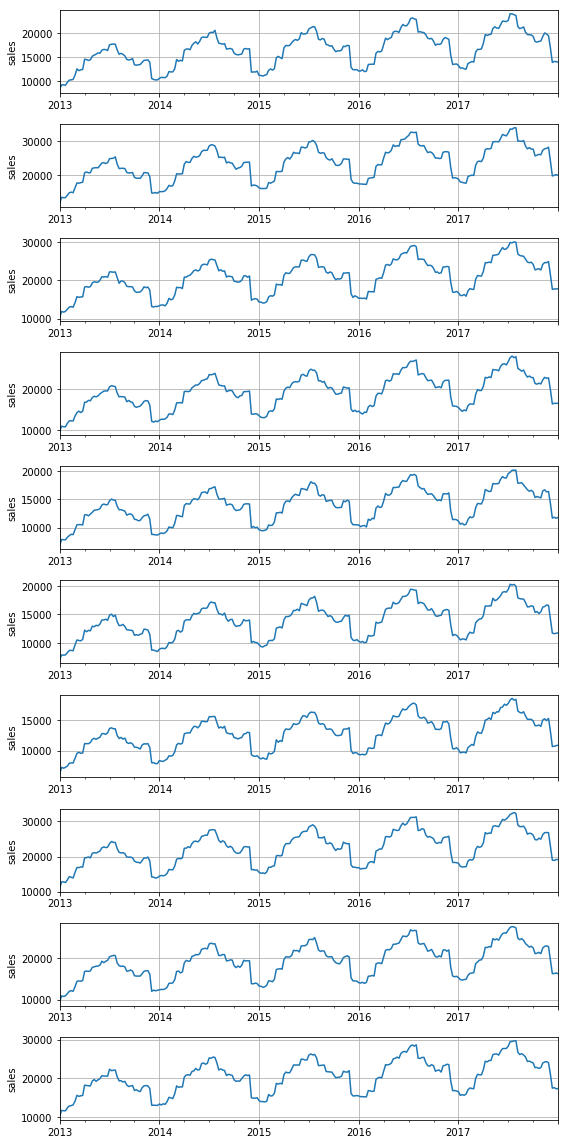

In [ ]:
num_stores = len(data['store'].unique())
fig, axes = plt.subplots(num_stores, figsize=(8, 16))

for s in data['store'].unique():
    t = data.loc[data['store'] == s, 'sales'].resample('W').sum()
    ax = t.plot(ax=axes[s-1])
    ax.grid()
    ax.set_xlabel('')
    ax.set_ylabel('sales')
fig.tight_layout();

ALL STORES SHOW SAME SEASONALITY AND TREND, CHOOSE 1 STORE AND 1 ITEM

In [ ]:
#since all stores show same seasonality and trend, we take 1 store and 1 item
store1_item1 = data.loc[(data['store'] == 1) & (data['item'] == 1)]

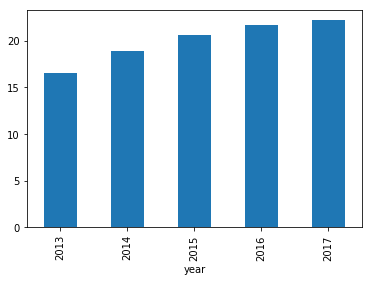

In [ ]:
store1_item1.groupby('year')['sales'].mean().plot.bar(figsize=(6,4))

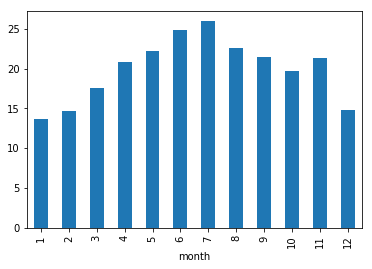

In [ ]:
store1_item1.groupby('month')['sales'].mean().plot.bar(figsize=(6,4))

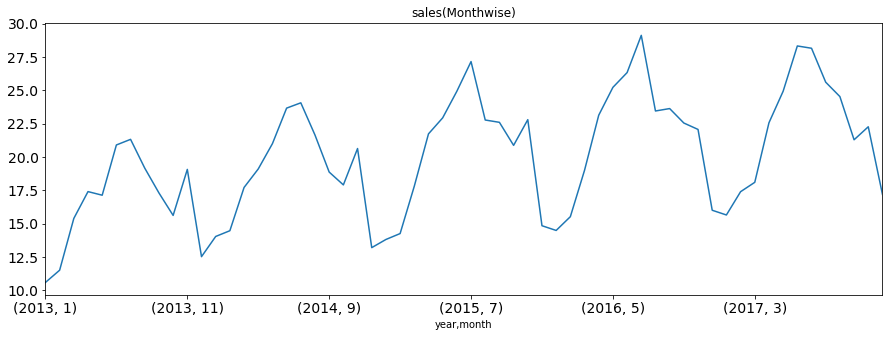

In [ ]:
temp=store1_item1.groupby(['year', 'month'])['sales'].mean() 
temp.plot(figsize=(15,5), title= 'sales(Monthwise)', fontsize=14)

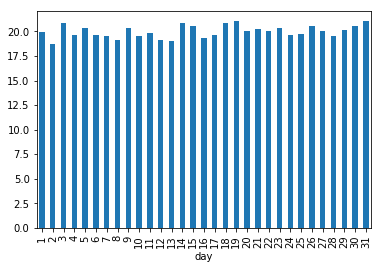

In [ ]:
store1_item1.groupby('day')['sales'].mean().plot.bar(figsize=(6,4))

In [ ]:
store1_item1.drop(['store', 'item', 'year', 'month', 'day'], axis = 1, inplace = True)

In [ ]:
store1_item1.shape

(1826, 1)

## ETS DECOMPOSTITION

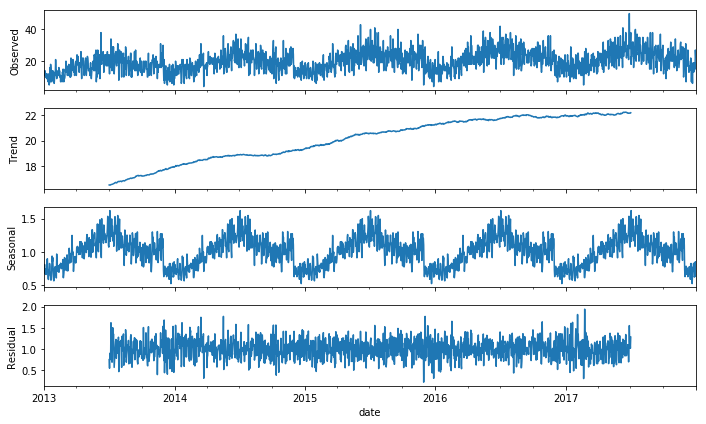

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
fig = seasonal_decompose(store1_item1['sales'], model='multiplicative', freq=365).plot()

## CHECK FOR STATIONARITY

In [ ]:
def test_stationarity(timeseries):


    rolmean = timeseries.rolling(window=24).mean()
    rolstd = timeseries.rolling(window=24).std()
    
    fig = plt.figure(figsize=(9, 6))
    orig = plt.plot(timeseries,label='Original')
    mean = plt.plot(rolmean, label='Rolling Mean')
    std = plt.plot(rolstd, label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

  

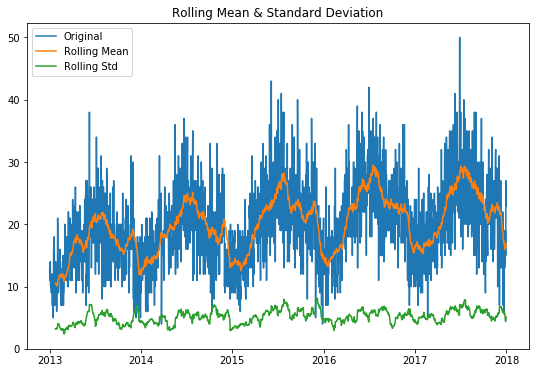

Results of Dickey-Fuller Test:
Test Statistic                   -2.987278
p-value                           0.036100
#Lags Used                       20.000000
Number of Observations Used    1805.000000
Critical Value (1%)              -3.433978
Critical Value (5%)              -2.863143
Critical Value (10%)             -2.567623
dtype: float64


In [ ]:
test_stationarity(store1_item1['sales'])

In [ ]:
first_diff = store1_item1.sales - store1_item1.sales.shift(1)
first_diff = first_diff.dropna(inplace = False)
first_diff.head()

date
2013-01-02   -2.0
2013-01-03    3.0
2013-01-04   -1.0
2013-01-05   -3.0
2013-01-06    2.0
Name: sales, dtype: float64

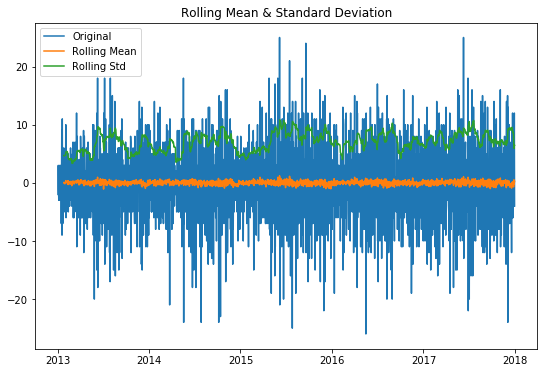

Results of Dickey-Fuller Test:
Test Statistic                -1.520810e+01
p-value                        5.705031e-28
#Lags Used                     2.000000e+01
Number of Observations Used    1.804000e+03
Critical Value (1%)           -3.433980e+00
Critical Value (5%)           -2.863143e+00
Critical Value (10%)          -2.567624e+00
dtype: float64


In [ ]:
test_stationarity(first_diff)

In [ ]:
store1_item1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-01-01 to 2017-12-31
Data columns (total 1 columns):
sales    1826 non-null int64
dtypes: int64(1)
memory usage: 28.5 KB


In [ ]:
s1i1_month=store1_item1.resample('MS').mean() 

In [ ]:
s1i1_month.head()

,sales
date,
2013-01-01,10.580645
2013-02-01,11.500000
2013-03-01,15.387097
2013-04-01,17.400000
2013-05-01,17.129032


In [ ]:
s1i1_month.shape

(60, 1)

## PLOT ACF AND PACF PLOTS

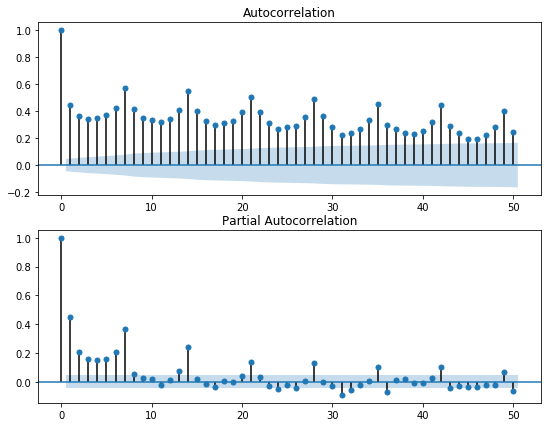

In [ ]:
plt.rcParams['figure.figsize'] = (9, 7)
fig, ax = plt.subplots(2)
ax[0] = sm.graphics.tsa.plot_acf(store1_item1.sales, lags=50, ax=ax[0])
ax[1] = sm.graphics.tsa.plot_pacf(store1_item1.sales, lags=50, ax=ax[1])

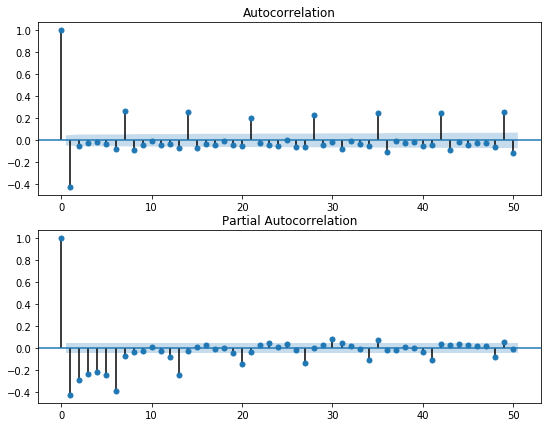

In [ ]:
fig, ax = plt.subplots(2)
ax[0] = sm.graphics.tsa.plot_acf(first_diff, lags=50, ax=ax[0])
ax[1] = sm.graphics.tsa.plot_pacf(first_diff, lags=50, ax=ax[1])

In [ ]:
  !pip install pmdarima

     |████████████████████████████████| 921kB 2.8MB/s 
     |████████████████████████████████| 24.8MB 9.6MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


## GRID SEARCH (MONTHLY DATA)

In [ ]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(s1i1_month['sales'], start_p=0, start_q=0,
                          max_p=5, max_q=5, m=12, seasonal=True, trace=True)
                         

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=171.706, BIC=179.107, Fit time=0.643 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=167.845, BIC=171.545, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=159.195, BIC=166.596, Fit time=0.137 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=150.423, BIC=157.824, Fit time=0.536 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=152.756, BIC=162.006, Fit time=0.732 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=148.756, BIC=154.306, Fit time=0.196 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=149.579, BIC=156.980, Fit time=0.488 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=149.827, BIC=157.228, Fit time=0.307 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=151.018, BIC=160.269, Fit time=0.504 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 

In [ ]:
print(stepwise_fit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood                 -71.378
Date:                            Thu, 25 Jul 2019   AIC                            148.756
Time:                                    08:11:37   BIC                            154.306
Sample:                                         0   HQIC                           150.845
                                             - 60                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0489      0.011     -4.517      0.000      -0.070      -0.028
ma.L1         -0.9992      6.314   

## SARIMA MODEL( MONTHLY DATA)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
train1 = s1i1_month.iloc[:48]
test1 = s1i1_month.iloc[48:]

In [ ]:
model1 = SARIMAX(train1['sales'],order=(0,1,1),seasonal_order=(0,1,0,12))
results1 = model1.fit()


In [ ]:
print(results1.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood                 -50.722
Date:                            Thu, 25 Jul 2019   AIC                            105.443
Time:                                    08:13:07   BIC                            108.554
Sample:                                01-01-2013   HQIC                           106.517
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5339      0.171     -3.126      0.002      -0.869      -0.199
sigma2         1.0522      0.273   

In [ ]:
# Obtain predicted values
start1=len(train1)
end1=len(train1)+len(test1)-1

predictions1 = results1.predict(start=start1, end=end1, dynamic=False, typ='levels').rename('')


In [ ]:
predictions1

2017-01-01    15.241402
2017-02-01    16.274773
2017-03-01    19.757531
2017-04-01    23.890865
2017-05-01    25.983338
2017-06-01    27.090865
2017-07-01    29.886563
2017-08-01    24.209144
2017-09-01    24.390865
2017-10-01    23.305918
2017-11-01    22.824198
2017-12-01    16.757531
Freq: MS, Name: SARIMA Predictions, dtype: float64

In [ ]:
test1

,sales
date,
2017-01-01,15.645161
2017-02-01,17.392857
2017-03-01,18.096774
2017-04-01,22.566667
2017-05-01,24.935484
2017-06-01,28.333333
2017-07-01,28.161290
2017-08-01,25.612903
2017-09-01,24.533333


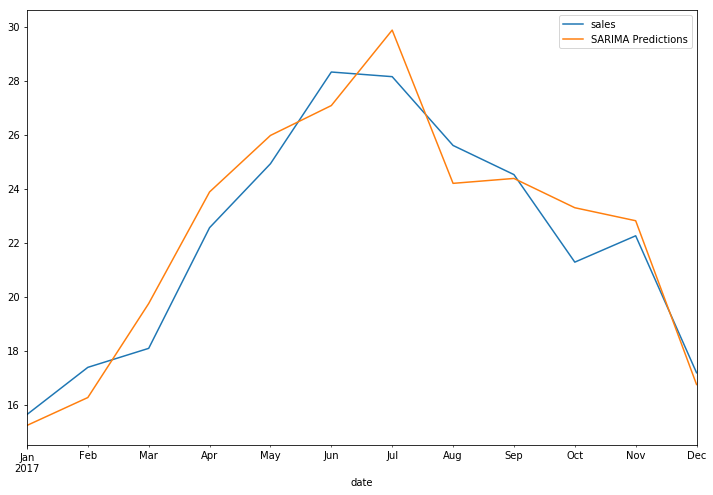

In [ ]:
a=test1['sales'].plot(legend=True, figsize=(12,8))
predictions1.plot(legend=True)

In [ ]:
error1 = rmse(test1['sales'], predictions1)


In [ ]:
error1

1.2280559473085317

## FORCAST INTO FUTURE(MONTHLY)

In [ ]:
model = SARIMAX(s1i1_month['sales'],order=(0,1,1),seasonal_order=(0,1,0,12))
results1 = model1.fit()


In [ ]:
fcast = results1.predict(len(s1i1_month),len(s1i1_month)+11,typ='levels').rename('SARIMA Forecast')

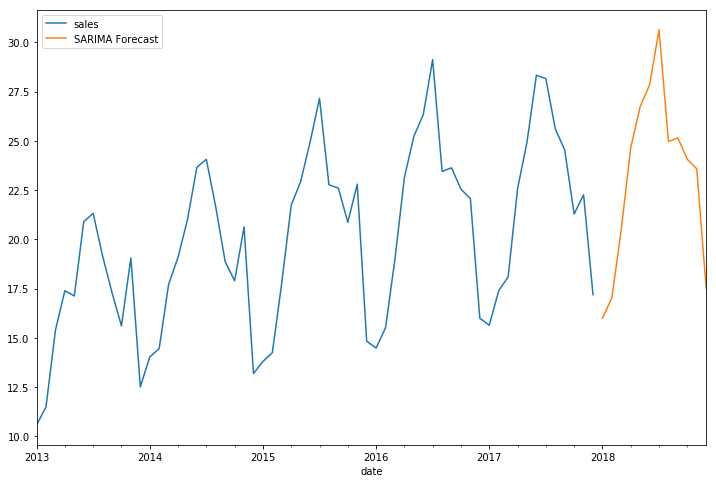

In [ ]:
s1i1_month['sales'].plot(legend=True, figsize=(12,8))
fcast.plot(legend=True)

In [ ]:
rmse(test1['sales'], fcast)

1.5920287850364685

## GRID SEARCH(DAILY DATA)

In [ ]:
stepwise1_fit = auto_arima(store1_item1['sales'], start_p=0, start_q=0,
                    max_p=5, max_q=5, m=7, seasonal=True, trace=True)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 7); AIC=11885.275, BIC=11907.312, Fit time=1.610 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=12329.035, BIC=12340.054, Fit time=0.032 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=11791.002, BIC=11813.039, Fit time=0.404 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=11233.966, BIC=11256.004, Fit time=0.627 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=10848.530, BIC=10876.077, Fit time=5.205 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=11178.455, BIC=11200.492, Fit time=0.902 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=10835.378, BIC=10868.434, Fit time=9.327 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=10843.523, BIC=10882.088, Fit time=10.735 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 2, 7); AIC=11883.414, BIC=11910.961, Fit time=5.829 seconds
Fit ARIMA: order=(

In [ ]:
print(stepwise1_fit.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                 1826
Model:             SARIMAX(0, 1, 1)x(1, 0, 2, 7)   Log Likelihood               -5411.689
Date:                           Tue, 23 Jul 2019   AIC                          10835.378
Time:                                   11:47:25   BIC                          10868.434
Sample:                                        0   HQIC                         10847.572
                                          - 1826                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.597e-06   2.21e-05     -0.208      0.835   -4.79e-05    3.87e-05
ma.L1         -0.8953      0.011    -80.780

In [ ]:
len(store1_item1)

1826

In [ ]:
len(s1i1_month)

60

## SARIMA MODEL(DAILY DATA)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
train = store1_item1.iloc[:1750]
test = store1_item1.iloc[1750:]

In [ ]:
train.head()

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10


In [ ]:
modelseasonal = SARIMAX(train['sales'],order=(0,1,1),seasonal_order=(1,0,2,7))
results_seasonal = modelseasonal.fit()


In [ ]:
print(results_seasonal.summary())

                                 Statespace Model Results                                
Dep. Variable:                             sales   No. Observations:                 1750
Model:             SARIMAX(0, 1, 1)x(1, 0, 2, 7)   Log Likelihood               -5183.414
Date:                           Tue, 23 Jul 2019   AIC                          10376.827
Time:                                   11:47:42   BIC                          10404.161
Sample:                               01-01-2013   HQIC                         10386.932
                                    - 10-16-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8979      0.011    -80.735      0.000      -0.920      -0.876
ar.S.L7        0.9999      0.000   5059.191

In [ ]:
start=len(train)
end=len(train)+len(test)-1
prediction_seasonal = results_seasonal.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions')

In [ ]:
prediction_seasonal.head()

2017-10-17    19.753756
2017-10-18    20.058277
2017-10-19    21.072537
2017-10-20    22.664097
2017-10-21    24.530506
Freq: D, Name: SARIMA Predictions, dtype: float64

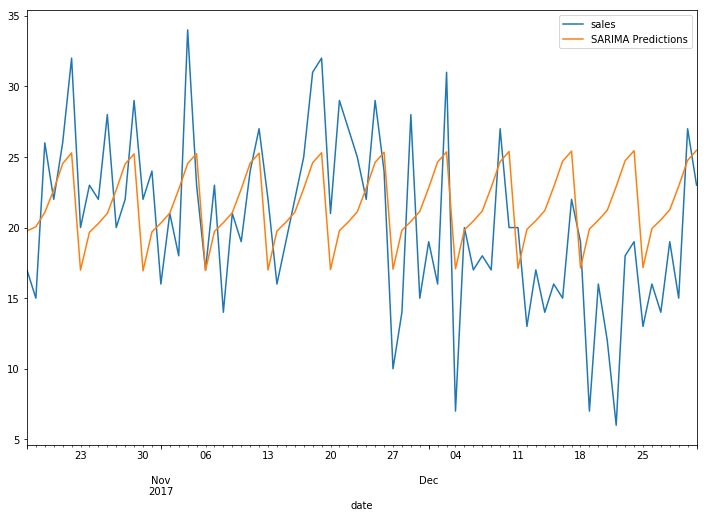

In [ ]:
test['sales'].plot(legend=True, figsize=(12,8))
prediction_seasonal.plot(legend=True)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(test['sales'], prediction_seasonal)
error

5.5419956546951115

In [ ]:
import pickle

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(results_seasonal, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
print(loaded_model.summary())

                                 Statespace Model Results                                
Dep. Variable:                             sales   No. Observations:                 1750
Model:             SARIMAX(0, 1, 1)x(1, 0, 2, 7)   Log Likelihood               -5183.414
Date:                           Tue, 23 Jul 2019   AIC                          10376.827
Time:                                   12:57:30   BIC                          10404.161
Sample:                               01-01-2013   HQIC                         10386.932
                                    - 10-16-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8979      0.011    -80.735      0.000      -0.920      -0.876
ar.S.L7        0.9999      0.000   5059.191

## FORECAST INTO FUTURE(DAILY)

In [ ]:
model = SARIMAX(store1_item1['sales'],order=(0,1,1),seasonal_order=(1,0,2,7))
results_seasonal = modelseasonal.fit()



In [ ]:
fcast1 = results_seasonal.predict(len(store1_item1),len(store1_item1)+75,typ='levels').rename('SARIMA Forecast')

In [ ]:
rmse(test['sales'], fcast1)

6.221033972296503

## FUTURE PREDICTIONS

In [ ]:
data_test = pd.read_csv('test.csv', parse_dates=['date'], index_col=['date'])

In [ ]:
data_test.head()

,id,store,item
date,,,
2018-01-01,0,1,1
2018-01-02,1,1,1
2018-01-03,2,1,1
2018-01-04,3,1,1
2018-01-05,4,1,1


In [ ]:
sarima_results = data_test.reset_index()
sarima_results['sales'] = 0

In [ ]:
import time

In [ ]:
tic = time.time()

for s in sarima_results['store'].unique():
    for i in sarima_results['item'].unique():
        si = data.loc[(data['store'] == s) & (data['item'] == i), 'sales']
        sarima1 =SARIMAX(si, trend='n', freq='D', enforce_invertibility=False, order=(0, 1, 1), seasonal_order=(1, 0, 2, 7))
        
        results_s = sarima1.fit()
        fcst = results_s.predict(start='2017-12-31', end='2018-03-31', dynamic=True)
        sarima_results.loc[(sarima_results['store'] == s) & (sarima_results['item'] == i), 'sales'] = fcst.values[1:]
        
        toc = time.time()
        if i % 10 == 0:
            print("Completed store {} item {}. Cumulative time: {:.1f}s".format(s, i, toc-tic))

Completed store 1 item 10. Cumulative time: 58.4s
Completed store 1 item 20. Cumulative time: 121.5s
Completed store 1 item 30. Cumulative time: 175.2s
Completed store 1 item 40. Cumulative time: 231.5s
Completed store 1 item 50. Cumulative time: 285.3s
Completed store 2 item 10. Cumulative time: 342.3s
Completed store 2 item 20. Cumulative time: 398.9s
Completed store 2 item 30. Cumulative time: 449.6s
Completed store 2 item 40. Cumulative time: 498.5s
Completed store 2 item 50. Cumulative time: 553.4s
Completed store 3 item 10. Cumulative time: 611.5s
Completed store 3 item 20. Cumulative time: 671.3s
Completed store 3 item 30. Cumulative time: 727.8s
Completed store 3 item 40. Cumulative time: 778.0s
Completed store 3 item 50. Cumulative time: 836.2s
Completed store 4 item 10. Cumulative time: 890.4s
Completed store 4 item 20. Cumulative time: 948.1s
Completed store 4 item 30. Cumulative time: 1005.2s
Completed store 4 item 40. Cumulative time: 1057.7s
Completed store 4 item 50. Cum

In [ ]:
sarima_results.drop(['date', 'store', 'item'], axis=1, inplace=True)
sarima_results.head()


,id,sales
0,0,12.413069
1,1,15.108644
2,2,15.608456
3,3,16.532528
4,4,17.762496
